# Part 1

## Preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:

data = pd.read_csv('./train.csv')
print(data.head(10))

  PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
mean_age = round(data['Age'].mean())
data['Age'].fillna(mean_age, inplace=True)
data = data.drop('Cabin', axis = 1)
data = data.dropna()


/var/folders/k3/gt4lmtwj7m541vkjm2tnqqhm0000gn/T/ipykernel_4609/3550582913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(mean_age, inplace=True)


In [8]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [32]:
data.describe(include="all")

PassengerId HomePlanet CryoSleep  Destination          Age    VIP  \
count         6917       6917      6917         6917  6917.000000   6917   
unique        6917          3         2            3          NaN      2   
top        0001_01      Earth     False  TRAPPIST-1e          NaN  False   
freq             1       3722      4450         4792          NaN   6749   
mean           NaN        NaN       NaN          NaN    28.893885    NaN   
std            NaN        NaN       NaN          NaN    14.355138    NaN   
min            NaN        NaN       NaN          NaN     0.000000    NaN   
25%            NaN        NaN       NaN          NaN    20.000000    NaN   
50%            NaN        NaN       NaN          NaN    27.000000    NaN   
75%            NaN        NaN       NaN          NaN    37.000000    NaN   
max            NaN        NaN       NaN          NaN    79.000000    NaN   

         RoomService     FoodCourt  ShoppingMall           Spa        VRDeck  \
count    6917.000000   6917.000000   6917.000000   6917.000000   6917.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      223.311840    477.041492    175.567732    319.259361    301.669221   
std       667.149199   1664.988115    568.467262   1171.200133   1119.263630   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%        46.000000     79.000000     28.000000     63.000000     49.000000   
max     14327.000000  29813.000000  12253.000000  22408.000000  20336.000000   

              Name Transported  
count         6917        6917  
unique        6900           2  
top     Sus Coolez        True  
freq             2        3482  
mean           NaN         NaN  
std            NaN         NaN  
min            NaN         NaN  
25%            NaN         NaN  
50%            NaN         NaN  
75%            NaN         NaN  
max            NaN         NaN

In [10]:
import matplotlib.pyplot as plt

## Diagrams

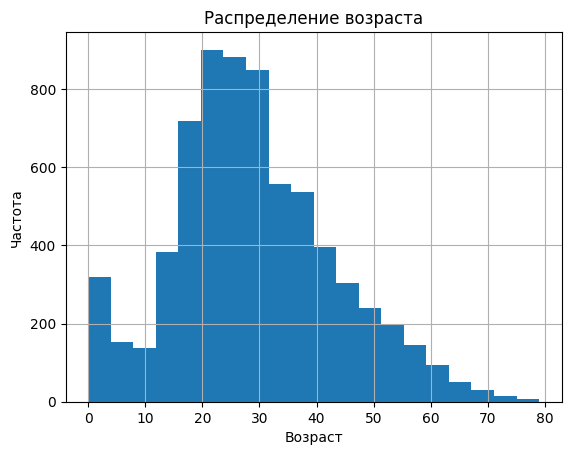

[318. 154. 138. 383. 718. 901. 883. 850. 557. 536. 396. 304. 239. 196.
 145.  94.  51.  31.  15.   8.]


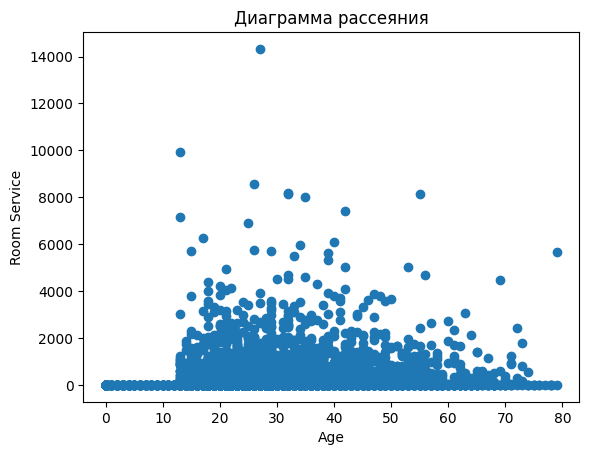

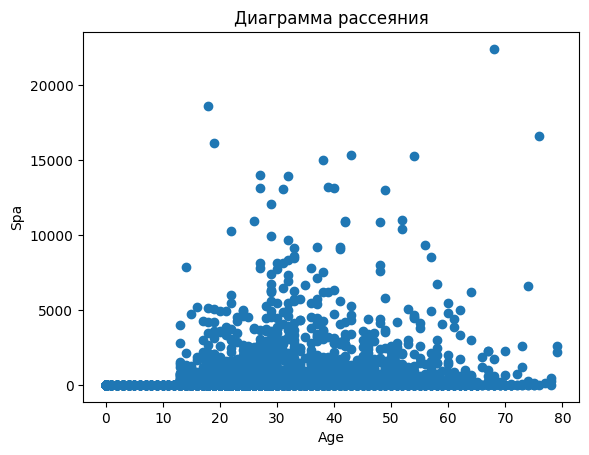

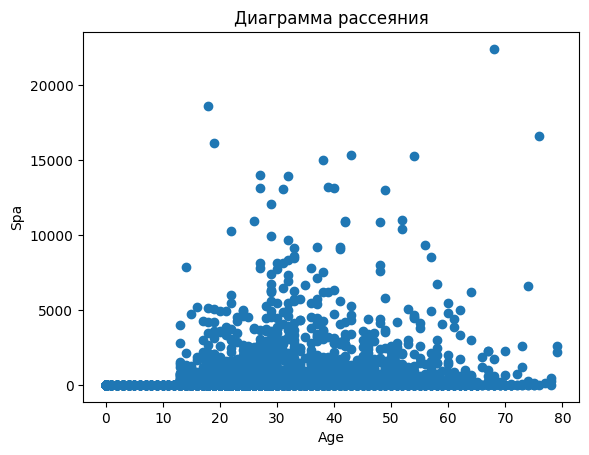

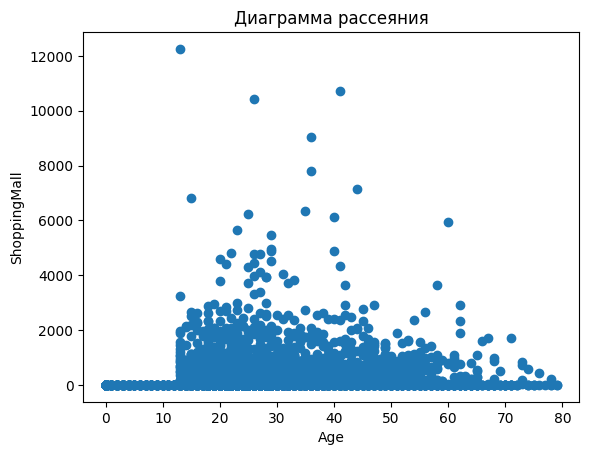

In [11]:

values = plt.hist(data['Age'], bins=20)
plt.grid()
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста')
plt.show()

# значения карманов гистограммы
print(values[0])
plt.scatter(y=data['RoomService'],x=data['Age'])
plt.xlabel('Age')
plt.ylabel('Room Service')
plt.title('Диаграмма рассеяния')
plt.show()

plt.scatter(y=data['Spa'],x=data['Age'])
plt.xlabel('Age')
plt.ylabel('Spa')
plt.title('Диаграмма рассеяния')
plt.show()

plt.scatter(y=data['Spa'],x=data['Age'])
plt.xlabel('Age')
plt.ylabel('Spa')
plt.title('Диаграмма рассеяния')
plt.show()

plt.scatter(y=data['ShoppingMall'],x=data['Age'])
plt.xlabel('Age')
plt.ylabel('ShoppingMall')
plt.title('Диаграмма рассеяния')
plt.show()

In [12]:
data.groupby('HomePlanet')[['Age', 'ShoppingMall', 'FoodCourt', 'Spa', 'RoomService']].mean()

Age  ShoppingMall    FoodCourt         Spa  RoomService
HomePlanet                                                               
Earth       26.080064    133.376411   134.199087  143.104514   135.634068
Europa      34.448413    148.501134  1546.465986  858.382086   138.345805
Mars        29.365479    318.671558    50.482879  112.855346   556.097834

In [13]:
numeric_data = data.drop(['HomePlanet', 'Destination', 'Name'], axis=1)
numeric_data.corr()

PassengerId  CryoSleep       Age       VIP  RoomService  \
PassengerId      1.000000  -0.000772 -0.008851  0.014829    -0.007143   
CryoSleep       -0.000772   1.000000 -0.084530 -0.084144    -0.249244   
Age             -0.008851  -0.084530  1.000000  0.097539     0.072984   
VIP              0.014829  -0.084144  0.097539  1.000000     0.047394   
RoomService     -0.007143  -0.249244  0.072984  0.047394     1.000000   
FoodCourt       -0.007236  -0.213344  0.135947  0.135054    -0.011515   
ShoppingMall     0.020174  -0.229972  0.041071  0.016440     0.057732   
Spa             -0.016156  -0.202978  0.122069  0.062271     0.005872   
VRDeck           0.007814  -0.200694  0.104203  0.125969    -0.024840   
Transported      0.023147   0.463664 -0.080304 -0.044273    -0.241764   

              FoodCourt  ShoppingMall       Spa    VRDeck  Transported  
PassengerId   -0.007236      0.020174 -0.016156  0.007814     0.023147  
CryoSleep     -0.213344     -0.229972 -0.202978 -0.200694     0.463664  
Age            0.135947      0.041071  0.122069  0.104203    -0.080304  
VIP            0.135054      0.016440  0.062271  0.125969    -0.044273  
RoomService   -0.011515      0.057732  0.005872 -0.024840    -0.241764  
FoodCourt      1.000000     -0.012406  0.220468  0.224069     0.052132  
ShoppingMall  -0.012406      1.000000  0.021841  0.000261     0.008204  
Spa            0.220468      0.021841  1.000000  0.148361    -0.220276  
VRDeck         0.224069      0.000261  0.148361  1.000000    -0.207458  
Transported    0.052132      0.008204 -0.220276 -0.207458     1.000000

<Axes: >

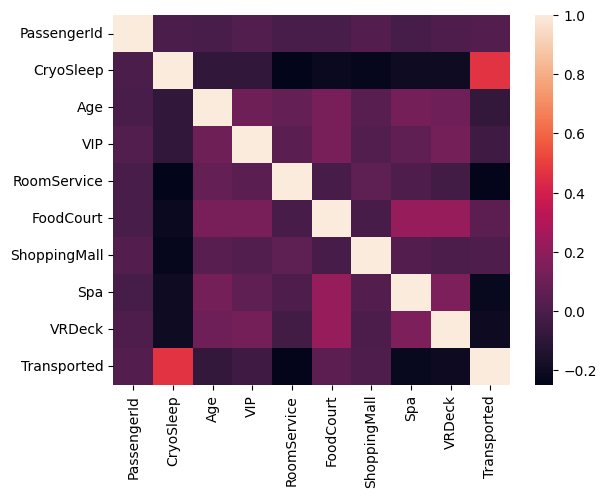

In [14]:
import seaborn as sns
sns.heatmap(numeric_data.corr())

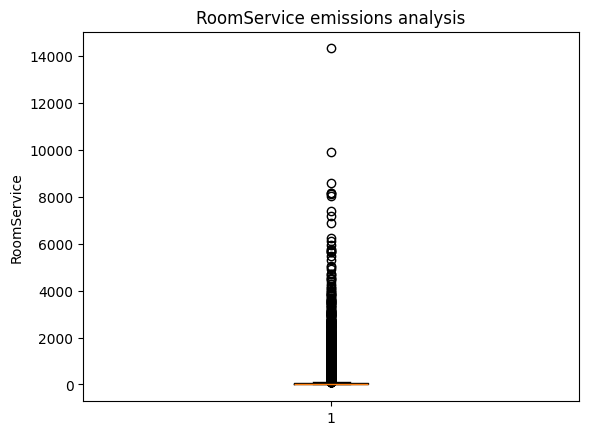

In [15]:
plt.boxplot(data['RoomService'])
plt.ylabel('RoomService')
plt.title('RoomService emissions analysis')
plt.show()

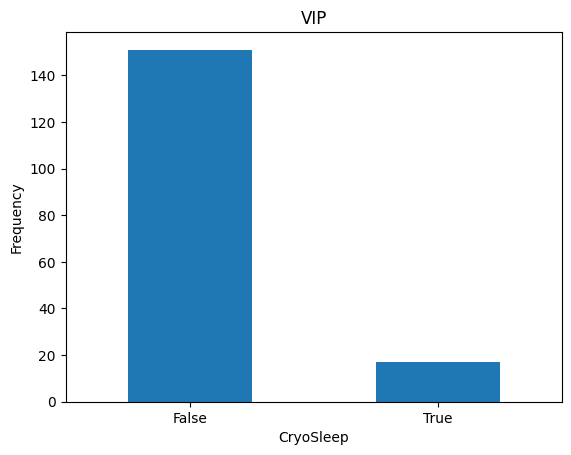

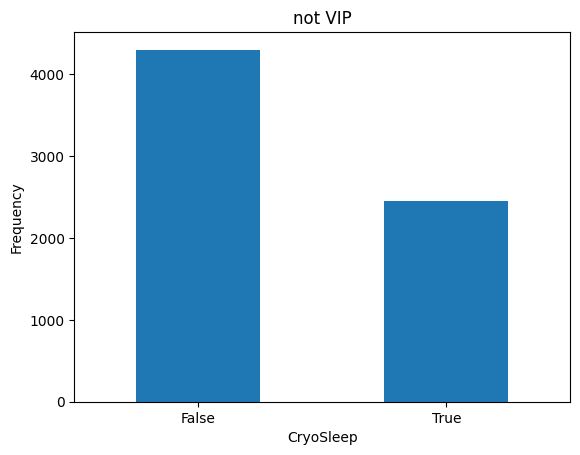

In [16]:
VIP_data = data[data['VIP'] == True]
VIP_CryoSleep_data = VIP_data['CryoSleep'].value_counts()
VIP_CryoSleep_data.plot(kind='bar')
plt.xlabel('CryoSleep')
plt.ylabel('Frequency')
plt.title('VIP')
plt.xticks(rotation= 0)
plt.show()


VIP_data = data[data['VIP'] == False]
VIP_CryoSleep_data = VIP_data['CryoSleep'].value_counts()
VIP_CryoSleep_data.plot(kind='bar')
plt.xlabel('CryoSleep')
plt.ylabel('Frequency')
plt.title('not VIP')
plt.xticks(rotation= 0)
plt.show()

In [17]:
!pip3 install ydata_profiling
!pip3 install ipywidgets

In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)

## Profile

In [19]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Part 2

K-neigbours and FeedForward Neuronet

## K-neigbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# cls = KNeighborsClassifier(n_neighbors=3).fit(data)

In [92]:
data
y_data = data['Spa']

x_data = pd.DataFrame({'Age' : data['Age'],
                       'ShoppingMall' : data['ShoppingMall'],
                       'RoomService' : data['RoomService'],
                       'CryoSleep' : data['CryoSleep']})


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= 0.2)



clf = KNeighborsClassifier(n_neighbors=5) .fit(x_train, y_train)
y_pred = clf.predict(x_test)
print( f"Accuracy: {accuracy_score(y_test, y_pred)}")
    


Accuracy: 0.6083815028901735


## FeedForward Neuronet

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6,3,2))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print( f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6242774566473989


/Users/macvejpazh/Documents/вучоба/RecognitionTheory/laba1/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
